# Project: License Plate Detection and Recognition using YOLOv8 and OCR

## Problem Understanding
As a Data Scientist, it's common to encounter data that is not always in the desired format. In this case, the data was in the form of images or videos, containing license plates. The task was to detect these license plates and extract their text information. This required multiple stages:

1. **Data Annotation**: Labeling the data to mark the license plates in the images by drawing bounding boxes.
2. **Data Conversion**: Converting these annotations into the YOLO format for model training.
3. **Model Training**: Training a YOLOv8 model using the labeled data to detect license plates.
4. **License Plate Extraction**: Extracting the detected license plate numbers from video data using Optical Character Recognition (OCR).

## Steps Involved

### 1. Data Annotation
- The first step was to prepare the dataset. I manually labeled the images by drawing bounding boxes around the license plates and converted the annotations into YOLO format (which involves `.txt` files specifying the coordinates of the bounding boxes).
  
### 2. Model Training
- Using the annotated dataset, I trained the YOLOv8 model. The YOLO (You Only Look Once) model is highly efficient for object detection tasks. It was chosen for its speed and accuracy, which are critical for real-time license plate detection.
  
- After training the model on the prepared dataset, I obtained a custom-trained YOLO model specifically designed to detect license plates.

### 3. License Plate Detection from Video
- With the trained model, I processed video data frame by frame to draw bounding boxes around detected license plates. This allowed me to visualize where the license plates were in the video and track them.

### 4. License Plate Number Extraction using OCR
- To extract the text of the license plates, I used **Tesseract OCR**. By applying Optical Character Recognition (OCR) on the detected license plate regions, I was able to extract the license plate numbers.

- Preprocessing was added to the detected regions for better OCR accuracy. This included converting the region to grayscale and applying thresholding.

### 5. Improving Recall
- I fine-tuned the detection and OCR extraction process to improve recall, ensuring that most of the license plates in the video were successfully detected and extracted.

## Results and Key Improvements
- After training the YOLOv8 model and integrating OCR, the recall (the ability to detect most true license plates) improved significantly.
- Deduplication logic was applied to avoid counting the same plate multiple times, which further refined the results.
  
## Code Implementation

### Steps to Run:
1. Upload your video file using the `files.upload()` function in Google Colab.
2. Use the trained YOLOv8 model (`best_license_plate_model.pt`) to detect license plates in the video.
3. Use the OCR (Tesseract) to extract the text from the detected license plate regions.
4. Deduplicate the extracted license plates to avoid counting the same plate multiple times.
5. The output video with bounding boxes will be saved, and the extracted license plate numbers will be stored in a CSV file.


\



# How to create labels and data?

## YOLO: A Brief History
1. YOLO (You Only Look Once), a popular object detection and image segmentation model, was developed by Joseph Redmon and Ali Farhadi at the University of Washington. Launched in 2015, YOLO quickly gained popularity for its high speed and accuracy.

2. YOLOv2, released in 2016, improved the original model by incorporating batch normalization, anchor boxes, and dimension clusters.
3. YOLOv3, launched in 2018, further enhanced the model's performance using a more efficient backbone network, multiple anchors and spatial pyramid pooling.
4. YOLOv4 was released in 2020, introducing innovations like Mosaic data augmentation, a new anchor-free detection head, and a new loss function.
5. YOLOv5 further improved the model's performance and added new features such as hyperparameter optimization, integrated experiment tracking and automatic export to popular export formats.
6. YOLOv6 was open-sourced by Meituan in 2022 and is in use in many of the company's autonomous delivery robots.
7. YOLOv7 added additional tasks such as pose estimation on the COCO keypoints dataset.
8. YOLOv8 is the latest version of YOLO by Ultralytics. As a cutting-edge, state-of-the-art (SOTA) model, YOLOv8 builds on the success of previous versions, introducing new features and improvements for enhanced performance, flexibility, and efficiency. YOLOv8 supports a full range of vision AI tasks, including detection, segmentation, pose estimation, tracking, and classification. This versatility allows users to leverage YOLOv8's capabilities across diverse applications and domains.
9. YOLOv9 Introduces innovative methods like Programmable Gradient Information (PGI) and the Generalized Efficient Layer Aggregation Network (GELAN).

In [ ]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split

In [ ]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split





In [ ]:
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 1


# Check if Cuda is Available

In [ ]:
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 1


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 46.2 MB/s eta 0:00:00


In [ ]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


# Setting up the dataset paths

In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("andrewmvd/car-plate-detection")



100%|██████████| 203M/203M [00:11<00:00, 19.0MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", dataset_path )

Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1


In [ ]:
import re

def the_number_in_the_string(filename):

    # Search for the first occurrence of one or more digits in the filename
    match = re.search(r'(\d+)', filename)

    # If a match is found, return the matched number as an integer
    if match:
        return int(match.group(0))
    # If no match is found, return 0
    else:
        return 0



In [ ]:
# Example usage
print(the_number_in_the_string("file123.txt"))
print(the_number_in_the_string("no_numbers_here"))

123
0


# Formatting the XML File and creating DF

In [ ]:
import os
import cv2
import pandas as pd
import xml.etree.ElementTree as xet
from glob import glob

# Initialize a dictionary to store labels and image information
labels_dict = dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)


In [ ]:


# Get the list of XML files from the annotations directory
xml_files = glob(f'{dataset_path}/annotations/*.xml')



In [ ]:
# Process each XML file, sorted by the numerical value in the filename
for filename in sorted(xml_files, key=the_number_in_the_string):
    # Parse the XML file
    info = xet.parse(filename)
    root = info.getroot()

    # Find the 'object' element in the XML and extract bounding box information
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    # Get the image filename and construct the full path to the image
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path, 'images', img_name)

    # Append the extracted information to the respective lists in the dictionary
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

    # Read the image to get its dimensions
    height, width, _ = cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)


In [ ]:

# Convert the dictionary to a pandas DataFrame
alldata = pd.DataFrame(labels_dict)

# Display the DataFrame
alldata

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/root/.cache/kagglehub/datasets/andrewmvd/car-...,249,368,48,129,400,225
1,/root/.cache/kagglehub/datasets/andrewmvd/car-...,316,364,91,126,400,225
2,/root/.cache/kagglehub/datasets/andrewmvd/car-...,52,73,170,182,400,256
3,/root/.cache/kagglehub/datasets/andrewmvd/car-...,160,187,217,228,400,267
4,/root/.cache/kagglehub/datasets/andrewmvd/car-...,54,91,201,226,400,266
...,...,...,...,...,...,...,...
428,/root/.cache/kagglehub/datasets/andrewmvd/car-...,118,154,148,169,236,314
429,/root/.cache/kagglehub/datasets/andrewmvd/car-...,3,45,205,220,400,290
430,/root/.cache/kagglehub/datasets/andrewmvd/car-...,254,372,229,264,400,478
431,/root/.cache/kagglehub/datasets/andrewmvd/car-...,201,288,191,230,500,375


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use 10% of the data for the test set
train, test = train_test_split(alldata, test_size=1/10, random_state=42)

# Split the training data further into training and validation sets
# Use 8/9 of the remaining data for the training set, resulting in an 80/10/10 split overall
train, val = train_test_split(train, train_size=8/9, random_state=42)

# Print the number of samples in each set
print(f'''
      len(train) = {len(train)}
      len(val) = {len(val)}
      len(test) = {len(test)}
''')



      len(train) = 345
      len(val) = 44
      len(test) = 44



In [ ]:
import os
import shutil
import pandas as pd

# Remove the 'datasets' directory if it exists
if os.path.exists('datasets'):
    shutil.rmtree('datasets')

In [ ]:
train

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
124,/root/.cache/kagglehub/datasets/andrewmvd/car-...,156,221,162,199,399,400
315,/root/.cache/kagglehub/datasets/andrewmvd/car-...,150,234,207,221,400,300
282,/root/.cache/kagglehub/datasets/andrewmvd/car-...,173,223,173,203,400,300
236,/root/.cache/kagglehub/datasets/andrewmvd/car-...,240,379,158,217,450,299
112,/root/.cache/kagglehub/datasets/andrewmvd/car-...,200,251,149,167,400,300
...,...,...,...,...,...,...,...
110,/root/.cache/kagglehub/datasets/andrewmvd/car-...,270,321,126,143,400,200
255,/root/.cache/kagglehub/datasets/andrewmvd/car-...,116,525,55,262,590,350
292,/root/.cache/kagglehub/datasets/andrewmvd/car-...,159,250,178,200,400,265
54,/root/.cache/kagglehub/datasets/andrewmvd/car-...,103,293,99,201,400,300


In [ ]:
def make_split_folder_in_yolo_format(split_name, split_df):

    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')

    # Create directories for labels and images
    os.makedirs(labels_path)
    os.makedirs(images_path)

    # Iterate over each row in the DataFrame
    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))

        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")

        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

    print(f"Created '{images_path}' and '{labels_path}'")

In [ ]:
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


In [ ]:
os.getcwd()

'/content'

![image.png](attachment:00956efa-22a1-49e2-b986-52c97b903c36.png)

yaml file

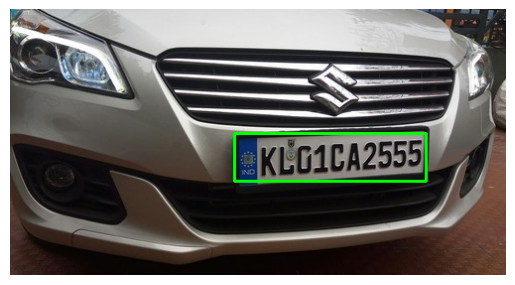

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory paths
image_dir = 'datasets/cars_license_plate_new/train/images'
label_dir = 'datasets/cars_license_plate_new/train/labels'

# Get the first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[0]

# Construct paths for the image and its corresponding label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

# Load the image using OpenCV
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the label file to get bounding box information
with open(label_path, 'r') as f:
    lines = f.readlines()

# Plot the bounding box on the image
for line in lines:
    # Parse the label file line to extract bounding box information
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding box using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()  # Display the image

create the yamal file   (data  structure formate)

In [ ]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: cars_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 152MB/s]


In [ ]:
model.train(
    data='datasets.yaml',
    epochs=100,
    batch=16,
    device='cuda',
    imgsz=320,
    cache=True
)

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 97.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 294MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 700.86it/s]

train: New cache created: /content/datasets/cars_license_plate_new/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:05<00:00, 60.63it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.19 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 522.60it/s]

val: New cache created: /content/datasets/cars_license_plate_new/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 84.18it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.646G      1.673      2.926      1.351         18        320: 100%|██████████| 22/22 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         44         44     0.0035      0.977      0.259      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.612G      1.492      1.567      1.152         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         44         44      0.787      0.169        0.6      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.623G      1.546      1.496      1.204         23        320: 100%|██████████| 22/22 [00:03<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44         44      0.626      0.659      0.633      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.617G      1.545      1.383      1.215         16        320: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         44         44      0.791      0.591      0.677      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.617G      1.467      1.295      1.189         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         44         44      0.729      0.409       0.58      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.617G      1.454      1.202      1.171         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all         44         44      0.849      0.659      0.725       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.617G       1.43      1.145      1.201         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         44         44      0.842      0.727      0.805      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.617G      1.462      1.109      1.205         16        320: 100%|██████████| 22/22 [00:05<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         44         44      0.637      0.773      0.726      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.617G       1.37      1.057      1.164         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44         44      0.767       0.75      0.725      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.617G      1.417      1.006      1.165         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         44         44      0.849       0.64      0.802      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.617G      1.387     0.9926      1.151         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         44         44      0.791      0.659      0.704      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.617G      1.319     0.9653      1.105         19        320: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         44         44      0.867      0.773      0.822      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.614G      1.334     0.9247      1.107         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         44         44      0.779      0.773      0.788      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.617G      1.302     0.8926      1.131         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]

                   all         44         44      0.835      0.818      0.828      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.617G      1.277     0.8675      1.103         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         44         44        0.9      0.841       0.86      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.617G      1.321     0.8807      1.133         13        320: 100%|██████████| 22/22 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         44         44      0.911      0.694      0.827      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.617G      1.346     0.8631      1.119         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all         44         44      0.698      0.773      0.799      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.617G      1.286      0.828       1.11         23        320: 100%|██████████| 22/22 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         44         44      0.889      0.773      0.862      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.617G      1.273     0.8105      1.099         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         44         44      0.899      0.727      0.774      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.617G      1.285     0.8124      1.131         20        320: 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         44         44      0.895      0.773      0.825      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.617G      1.278     0.8184      1.116         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         44         44      0.957       0.75      0.834       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.617G      1.263     0.8147      1.109         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         44         44      0.901      0.841      0.892      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.617G      1.209      0.795      1.108         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         44         44      0.888      0.795      0.868      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.617G       1.21     0.7599      1.061         19        320: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         44         44      0.817      0.818      0.799      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.617G      1.156     0.7456      1.062         21        320: 100%|██████████| 22/22 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         44         44       0.87      0.773      0.817       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.614G      1.187     0.7502      1.075         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         44         44      0.924      0.832      0.907       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.617G      1.146     0.6978      1.057         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         44         44      0.899      0.805      0.827      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.617G      1.146     0.7117      1.045         19        320: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44         44      0.806      0.795      0.797      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.617G      1.122     0.7031      1.059         23        320: 100%|██████████| 22/22 [00:02<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         44         44      0.841      0.719      0.735      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.617G       1.14     0.7088      1.038         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         44         44      0.906      0.705      0.786       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.614G      1.144     0.6725      1.057         16        320: 100%|██████████| 22/22 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         44         44      0.795      0.818      0.836      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.617G      1.116     0.6729      1.027         16        320: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         44         44      0.946       0.79      0.859      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.617G      1.129      0.701      1.039         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         44         44      0.921      0.773       0.88      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.617G      1.123      0.682      1.053         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         44         44      0.908       0.75       0.84      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.614G      1.109      0.689      1.051         15        320: 100%|██████████| 22/22 [00:03<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         44         44      0.947       0.75      0.865      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.617G      1.113     0.6871      1.026         21        320: 100%|██████████| 22/22 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         44         44       0.89      0.841      0.877      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.614G      1.051     0.6501      1.013         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         44         44      0.944      0.766      0.851      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.617G      1.078     0.6593      1.032         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         44         44      0.827      0.818       0.82      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.617G       1.06      0.653      1.026         20        320: 100%|██████████| 22/22 [00:03<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44         44      0.781      0.773      0.804      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.617G      1.052     0.6335       1.02         21        320: 100%|██████████| 22/22 [00:05<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         44         44      0.865      0.728       0.81      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.617G      1.066     0.6611      1.014         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         44         44      0.848      0.761      0.841      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.614G      1.093     0.6763      1.008         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         44         44      0.852      0.795      0.826      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.617G      1.087     0.6326      1.006         14        320: 100%|██████████| 22/22 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         44         44      0.833      0.864      0.856        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.617G      1.012     0.6285     0.9859         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         44         44      0.858      0.795      0.835      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.614G     0.9956      0.597      1.004         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         44         44      0.856       0.81      0.836      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.617G      1.003     0.6086      1.007         18        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         44         44       0.87      0.761       0.86      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.617G      1.019     0.6154     0.9958         18        320: 100%|██████████| 22/22 [00:04<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         44         44      0.853      0.788      0.848      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.614G      1.013     0.6307     0.9979         14        320: 100%|██████████| 22/22 [00:05<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         44         44      0.918      0.764      0.839      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.617G      0.999     0.6041     0.9993         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         44         44      0.925      0.727      0.841      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.614G       1.02     0.6152     0.9949         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         44         44      0.858      0.795      0.797      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.617G     0.9768     0.6011     0.9974         19        320: 100%|██████████| 22/22 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         44         44      0.914      0.727       0.82      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.617G      1.019     0.6002      1.018         15        320: 100%|██████████| 22/22 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         44         44      0.818      0.815      0.837      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.614G     0.9911     0.5841     0.9973         12        320: 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         44         44       0.85      0.795      0.835      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.617G     0.9648     0.6105      1.002         23        320: 100%|██████████| 22/22 [00:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         44         44      0.876      0.818      0.867      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.614G      0.991     0.5943     0.9958         13        320: 100%|██████████| 22/22 [00:03<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         44         44      0.779      0.864      0.877      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.617G     0.9643     0.5801      0.987         16        320: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         44         44      0.854      0.818      0.848      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.614G     0.9669     0.5789      0.996         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         44         44      0.867      0.773      0.845      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.617G     0.9872     0.5746     0.9978         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         44         44      0.834      0.705      0.758      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.614G     0.9543     0.5524     0.9954         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         44         44      0.836       0.75      0.809      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.617G     0.9345     0.5524     0.9771         15        320: 100%|██████████| 22/22 [00:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         44         44      0.881      0.773      0.854      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.617G     0.9317     0.5656     0.9679         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         44         44      0.956      0.727      0.846      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.617G     0.9294     0.5511     0.9844         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         44         44      0.857      0.817       0.83      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.614G     0.8905     0.5246     0.9778          7        320: 100%|██████████| 22/22 [00:04<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         44         44       0.85      0.841      0.858      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.617G     0.8967     0.5365     0.9696         14        320: 100%|██████████| 22/22 [00:05<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         44         44      0.881      0.795      0.865      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.617G     0.9413     0.5583     0.9762         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         44         44      0.916      0.748      0.839      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.617G     0.9206     0.5441     0.9738         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all         44         44      0.866       0.75      0.842      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.614G     0.9046      0.544     0.9898         12        320: 100%|██████████| 22/22 [00:03<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         44         44      0.918      0.768      0.845      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.617G     0.9016     0.5265     0.9512         23        320: 100%|██████████| 22/22 [00:05<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         44         44      0.859      0.818      0.869      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.617G     0.8793      0.524     0.9722         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         44         44      0.826      0.795      0.822       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.617G     0.9147     0.5312     0.9847         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         44         44      0.901      0.773      0.847      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.617G     0.8988     0.5169     0.9677         13        320: 100%|██████████| 22/22 [00:03<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         44         44      0.829      0.818      0.851      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.617G     0.8894     0.5223     0.9636         14        320: 100%|██████████| 22/22 [00:05<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         44         44       0.82      0.841      0.848      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.614G     0.8878     0.5319     0.9617         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         44         44      0.854      0.795       0.85      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.617G     0.8957     0.5091     0.9623         10        320: 100%|██████████| 22/22 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all         44         44      0.834      0.818       0.83       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.614G     0.8896     0.5238     0.9668         11        320: 100%|██████████| 22/22 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         44         44      0.892      0.773      0.851      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.617G     0.8509      0.512     0.9672         14        320: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         44         44      0.946      0.773       0.85      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.617G      0.861     0.5079     0.9472         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         44         44      0.928      0.773      0.852      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.617G     0.8767     0.5033     0.9737         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         44         44      0.874      0.795      0.839      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.617G     0.8363     0.4856      0.946         21        320: 100%|██████████| 22/22 [00:04<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         44         44      0.873      0.795      0.839      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.617G     0.8866     0.5002     0.9566         19        320: 100%|██████████| 22/22 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         44         44      0.849      0.795       0.85       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.617G      0.844     0.4781      0.951         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         44         44      0.879      0.795      0.862      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.617G     0.8666     0.4919     0.9515         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         44         44      0.838      0.841      0.865      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.614G     0.8169     0.4803     0.9369         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         44         44       0.86      0.839      0.859       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.617G      0.803     0.4847     0.9327         20        320: 100%|██████████| 22/22 [00:03<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         44         44      0.851      0.818      0.846      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.617G     0.8167     0.4806     0.9308         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         44         44      0.848      0.795      0.818      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.617G     0.8316     0.4916     0.9489         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         44         44      0.808      0.818      0.834      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.617G     0.8267     0.4874     0.9327         24        320: 100%|██████████| 22/22 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         44         44      0.813      0.818      0.836      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.614G     0.8064     0.4693     0.9269          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         44         44      0.836      0.813      0.833      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.614G     0.7874     0.4571      0.946         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         44         44       0.83      0.818      0.843      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.614G     0.8133     0.4865     0.9573         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         44         44      0.832      0.773      0.843      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.614G      1.081     0.5671      1.056          9        320: 100%|██████████| 22/22 [00:06<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         44         44      0.837      0.814      0.834      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.614G      1.042     0.5355      1.029          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         44         44      0.822      0.839      0.833      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.614G     0.9829     0.5108       1.02          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         44         44       0.82      0.841       0.85      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.614G     0.9949     0.4958      1.023          9        320: 100%|██████████| 22/22 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         44         44      0.848      0.818      0.851      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.614G     0.9611      0.498     0.9853          9        320: 100%|██████████| 22/22 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         44         44      0.937      0.727      0.835       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.614G     0.9701     0.4956     0.9911          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         44         44      0.808      0.795      0.826      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.614G     0.9794     0.5085       1.01          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         44         44      0.833      0.818       0.83      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.617G      0.948     0.4995     0.9853          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         44         44       0.83      0.818      0.828      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.614G     0.9447      0.497     0.9938          9        320: 100%|██████████| 22/22 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         44         44       0.83      0.818      0.825      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.617G     0.9455     0.4819     0.9959          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         44         44      0.821      0.836      0.843      0.492



100 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]


                   all         44         44       0.87      0.762      0.859       0.54
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▂▄▇██▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▇████▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg2,████▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▃▅▇▇▆▆█▆█▄▆▆▇▆▆▆▆▆▅▇▆▇▇▆▆▆▆▆▇▇▆▆▆▇▆▆▇
metrics/mAP50-95(B),▂▁▂▄▅▆▅▆▆▆▆▆▆▇▇▇▇▇▆▆▇▇█▇▇▇▇▇▇▇█▇▇█▇▇█▇▇█
metrics/precision(B),▄▁▅▁▆▇▆▂▄▆▆█▂▅▄▇▅▄▁▅▄▅▇▅▇▃▃▄▆▇▅▄▄▅▃▄▃█▄▅
metrics/recall(B),█▂▁▂▄▄▄▅▆▄▅▅▅▄▄▄▅▆▅▅▆▃▅▆▄▅▆▅▅▄▅▅▆▅▅▅▆▅▅▄
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▆▆▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▂▂▁▁▁▁▁▃▃▃▂


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cca22298d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

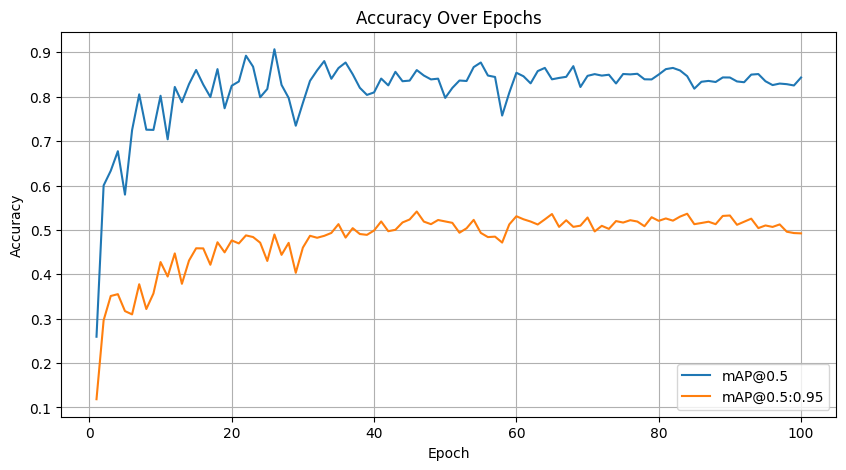

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key=the_number_in_the_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading/trailing whitespace from column names

# Extract epochs and accuracy metrics
epochs = results.index + 1  # Epochs are zero-indexed, so add 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU=0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU=0.5:0.95

# Plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the trained model
model.save('best_license_plate_model.pt')

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars245.png: 224x320 1 license_plate, 53.8ms
Speed: 0.9ms preprocess, 53.8ms inference, 21.1ms postprocess per image at shape (1, 3, 224, 320)


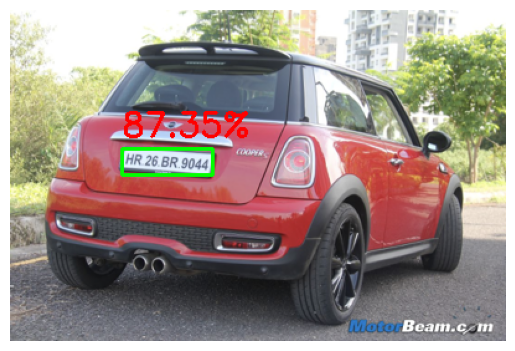

In [ ]:
predict_and_plot(test.iloc[0].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars170.png: 256x320 1 license_plate, 67.4ms
Speed: 1.5ms preprocess, 67.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)


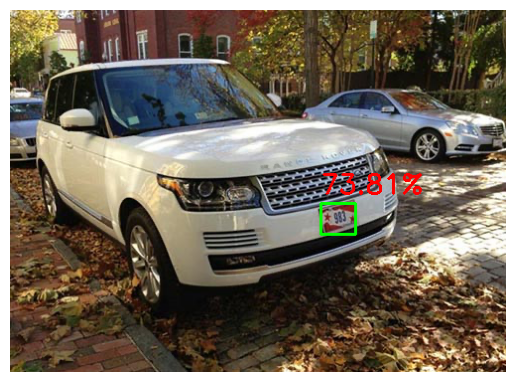

In [ ]:
predict_and_plot(test.iloc[1].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars47.png: 256x320 2 license_plates, 40.9ms
Speed: 0.9ms preprocess, 40.9ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 320)


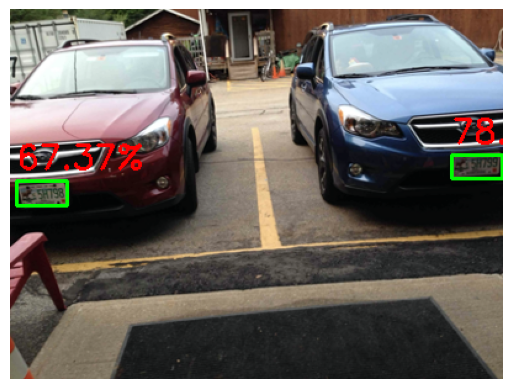

In [ ]:
predict_and_plot(test.iloc[2].img_path)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

In [ ]:
def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the given video using the trained YOLO model.

    Parameters:
    video_path (str): Path to the input video file.
    output_path (str): Path to save the output video with bounding boxes.
    """
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties (such as width, height, and FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO predictions on each frame
        results = model.predict(frame, device='cpu')

        # Extract the bounding boxes and labels from the results
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Get the confidence score of the prediction
                confidence = box.conf[0]

                # Draw the bounding box on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the confidence score near the bounding box
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Write the frame with bounding boxes into the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name  # Use the uploaded video file
    output_video_path = "output_video.mp4"  # Specify output path

    # Run the function to process the video
    predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Download the output video
    files.download(output_video_path)

Saving demo.mp4 to demo.mp4

0: 224x320 1 license_plate, 39.7ms
Speed: 2.5ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 37.8ms
Speed: 1.1ms preprocess, 37.8ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 41.4ms
Speed: 1.2ms preprocess, 41.4ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 47.9ms
Speed: 1.1ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 39.9ms
Speed: 1.0ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 38.5ms
Speed: 1.5ms preprocess, 38.5ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 2 license_plates, 37.9ms
Speed: 1.2ms preprocess, 37.9ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 36.1ms
Spee

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://drive.google.com/file/d/1ajEvYHg9qHh35MDi6-swUOm1Qaq-MlxC/view?usp=sharing

In [ ]:
def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the given video using the trained YOLO model.

    Parameters:
    video_path (str): Path to the input video file.
    output_path (str): Path to save the output video with bounding boxes.
    """
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties (such as width, height, and FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO predictions on each frame
        results = model.predict(frame, device='cpu')

        # Extract the bounding boxes and labels from the results
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Get the confidence score of the prediction
                confidence = box.conf[0]

                # Draw the bounding box on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the confidence score near the bounding box
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Write the frame with bounding boxes into the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name  # Use the uploaded video file
    output_video_path = "output_video.mp4"  # Specify output path

    # Run the function to process the video
    predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Download the output video
    files.download(output_video_path)

Saving mycarplate.mp4 to mycarplate (2).mp4

0: 192x320 (no detections), 33.0ms
Speed: 2.5ms preprocess, 33.0ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 27.7ms
Speed: 0.8ms preprocess, 27.7ms inference, 0.4ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 (no detections), 29.7ms
Speed: 1.1ms preprocess, 29.7ms inference, 0.4ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 license_plate, 29.9ms
Speed: 1.2ms preprocess, 29.9ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 license_plate, 28.6ms
Speed: 0.8ms preprocess, 28.6ms inference, 0.7ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 license_plate, 39.1ms
Speed: 1.1ms preprocess, 39.1ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 license_plate, 39.0ms
Speed: 1.1ms preprocess, 39.0ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 320)

0: 192x320 1 license_pla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://drive.google.com/file/d/10jyby4TrC467txvcBSYT59u6uU0oWoyG/view?usp=sharing

In [ ]:
def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the given video using the trained YOLO model.

    Parameters:
    video_path (str): Path to the input video file.
    output_path (str): Path to save the output video with bounding boxes.
    """
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties (such as width, height, and FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO predictions on each frame
        results = model.predict(frame, device='cpu')

        # Extract the bounding boxes and labels from the results
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Get the confidence score of the prediction
                confidence = box.conf[0]

                # Draw the bounding box on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the confidence score near the bounding box
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Write the frame with bounding boxes into the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name  # Use the uploaded video file
    output_video_path = "output_video.mp4"  # Specify output path

    # Run the function to process the video
    predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Download the output video
    files.download(output_video_path)

Streaming output truncated to the last 5000 lines.
0: 224x320 (no detections), 39.2ms
Speed: 1.2ms preprocess, 39.2ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 (no detections), 37.0ms
Speed: 1.9ms preprocess, 37.0ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 (no detections), 35.9ms
Speed: 1.3ms preprocess, 35.9ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 (no detections), 34.5ms
Speed: 1.3ms preprocess, 34.5ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 (no detections), 35.5ms
Speed: 1.2ms preprocess, 35.5ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 36.4ms
Speed: 1.2ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 36.5ms
Speed: 1.2ms preprocess, 36.5ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 (no det

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://drive.google.com/file/d/1w5EH3M1MVltmxIm2KCHgMU9ZwVg_yPy0/view?usp=sharing

# OCR

In [ ]:
import subprocess

subprocess.run(["pip3", "install", "pytesseract"])


CompletedProcess(args=['pip3', 'install', 'pytesseract'], returncode=0)

In [ ]:
!sudo apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 4s (1,271 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract

In [ ]:
pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.6 MB/s eta 0:00:00


In [ ]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [ ]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX512BW
 Found AVX512F
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
from PIL import Image
import pytesseract


In [ ]:
!pip install opencv-python ipywidgets


In [ ]:
import cv2
import os
import random
from google.colab import files  # Importing files from Google Colab
import numpy as np

def extract_frames(video_path, output_folder):
    """
    Extract frames from a video and save them as images.

    Parameters:
    video_path (str): Path to the video file.
    output_folder (str): Folder to save extracted frames.
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    os.makedirs(output_folder, exist_ok=True)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    cap.release()
    print(f"Extracted {frame_count} frames.")

def create_yolo_annotations(frames_folder, output_folder, num_boxes=1):
    """
    Create YOLO format annotations for the extracted frames with dummy bounding boxes.

    Parameters:
    frames_folder (str): Folder containing the extracted frames.
    output_folder (str): Folder to save YOLO annotations.
    num_boxes (int): Number of dummy bounding boxes per frame.
    """
    os.makedirs(output_folder, exist_ok=True)

    for frame_name in os.listdir(frames_folder):
        if frame_name.endswith('.jpg'):
            img_path = os.path.join(frames_folder, frame_name)
            img = cv2.imread(img_path)
            img_h, img_w, _ = img.shape

            yolo_annotations = []
            # Example of a more realistic bounding box generation strategy
            for _ in range(num_boxes):
                # Define realistic ranges for object sizes
                box_width = random.randint(30, img_w // 4)  # Width between 30 and 1/4 of the image width
                box_height = random.randint(30, img_h // 4)  # Height between 30 and 1/4 of the image height

                xmin = random.randint(0, img_w - box_width)
                ymin = random.randint(0, img_h - box_height)
                xmax = xmin + box_width
                ymax = ymin + box_height

                # Calculate YOLO format bounding box coordinates
                x_center = (xmin + xmax) / 2 / img_w
                y_center = (ymin + ymax) / 2 / img_h
                width = (xmax - xmin) / img_w
                height = (ymax - ymin) / img_h

                yolo_annotations.append(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")  # Class id is 0

            # Save annotations in YOLO format
            label_file = os.path.join(output_folder, f'{os.path.splitext(frame_name)[0]}.txt')
            with open(label_file, 'w') as f:
                f.writelines(yolo_annotations)
def upload_video_and_process():
    """
    Upload a video and process it.
    """
    uploaded = files.upload()  # Uploading video file
    for file_name in uploaded.keys():
        video_path = file_name  # Get the uploaded video file name

        frames_folder = 'extracted_frames'       # Folder to save extracted frames
        annotations_folder = 'yolo_labels'       # Folder to save YOLO annotations

        # Extract frames from the video
        extract_frames(video_path, frames_folder)

        # Create YOLO annotations for the extracted frames with dummy bounding boxes
        create_yolo_annotations(frames_folder, annotations_folder, num_boxes=100)  # Change num_boxes as needed
        print("Processing complete.")

# Run the function to upload a video and process it
upload_video_and_process()

Saving demo.mp4 to demo (1).mp4
Extracted 631 frames.
Processing complete.


In [4]:
import cv2
import os
from ultralytics import YOLO
import numpy as np
from google.colab import files

def load_ground_truth_labels(label_dir, frame_idx):
    label_file = f"{label_dir}/frame_{str(frame_idx).zfill(4)}.txt"
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            labels = f.readlines()
        ground_truth_boxes = []
        for label in labels:
            parts = label.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            ground_truth_boxes.append([x_center, y_center, width, height])
        return ground_truth_boxes
    else:
        return []

def convert_yolo_to_corners(box, img_width, img_height):
    x_center, y_center, width, height = box
    x1 = int((x_center - width / 2) * img_width)
    y1 = int((y_center - height / 2) * img_height)
    x2 = int((x_center + width / 2) * img_width)
    y2 = int((y_center + height / 2) * img_height)
    return [x1, y1, x2, y2]

def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def evaluate_predictions(predicted_boxes, ground_truth_boxes, img_width, img_height, iou_threshold=0.5):
    correct_detections = 0
    for gt_box in ground_truth_boxes:
        gt_corners = convert_yolo_to_corners(gt_box, img_width, img_height)
        for pred_box in predicted_boxes:
            iou = calculate_iou(pred_box, gt_corners)
            if iou > iou_threshold:
                correct_detections += 1
                break  # Only count one match per ground truth box
    return correct_detections

def process_video_and_evaluate(video_path, label_dir, model, output_video, iou_threshold=0.2):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    correct_predictions = 0
    total_ground_truth_boxes = 0
    total_detected_boxes = 0

    # Video writer for annotated output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Get ground truth labels for the current frame
        ground_truth_boxes = load_ground_truth_labels(label_dir, frame_idx)
        total_ground_truth_boxes += len(ground_truth_boxes)

        # YOLO model prediction
        results = model.predict(frame, device='cpu')[0]
        predicted_boxes = [list(map(int, box.xyxy[0])) for box in results.boxes]
        total_detected_boxes += len(predicted_boxes)

        # Evaluate predictions
        correct_detections = evaluate_predictions(predicted_boxes, ground_truth_boxes, width, height, iou_threshold)
        correct_predictions += correct_detections

        # Draw predicted boxes on frame
        for box in predicted_boxes:
            x1, y1, x2, y2 = box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Save the annotated frame
        out.write(frame)
        frame_idx += 1

    # Calculate accuracy metrics
    precision = correct_predictions / total_detected_boxes if total_detected_boxes > 0 else 0
    recall = correct_predictions / total_ground_truth_boxes if total_ground_truth_boxes > 0 else 0


    print(f"Total Detected Boxes: {total_detected_boxes}")
    print(f"Correct Predictions ): {correct_predictions}")
    print(f"Precision: {precision:.4f}")


    # Release resources
    cap.release()
    out.release()

# Upload the video and labels
uploaded = files.upload()

# Find the uploaded video file
for file_name in uploaded.keys():
    video_path = file_name

# Specify the label directory
label_dir = "/content/yolo_labels"  # Directory with ground truth labels
output_video = "output_annotated_video.mp4"  # Output annotated video

# Load your trained YOLO model
model = YOLO('/content/best_license_plate_model.pt')

# Process video and evaluate predictions
process_video_and_evaluate(video_path, label_dir, model, output_video)

# Download the output annotated video
files.download(output_video)


Saving demo.mp4 to demo (6).mp4

0: 416x640 2 license_plates, 105.1ms
Speed: 6.7ms preprocess, 105.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 95.3ms
Speed: 4.5ms preprocess, 95.3ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 102.1ms
Speed: 3.4ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 91.6ms
Speed: 3.4ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 82.8ms
Speed: 2.5ms preprocess, 82.8ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 92.2ms
Speed: 5.1ms preprocess, 92.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 92.7ms
Speed: 3.6ms preprocess, 92.7ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# OCR


In [ ]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Ensure pytesseract knows where Tesseract is installed (modify the path accordingly)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path as per your system

def predict_and_plot(model, path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.
    Also performs OCR on the detected bounding boxes to extract text.

    Parameters:
    model (YOLO): The trained YOLO model.
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    if image is None:
        print(f"Error: Unable to load image {path_test_car}")
        return

    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Crop the bounding box from the image for OCR
            roi = image[y1:y2, x1:x2]

            # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


# Assuming 'model' is your trained YOLO model
# Load the saved model for prediction
model = YOLO('best_license_plate_model.pt')
  # Load your YOLO model here

# Assuming 'test' DataFrame contains image paths under the 'img_path' column
predict_and_plot(model, test.iloc[0].img_path)
predict_and_plot(model, test.iloc[1].img_path)
predict_and_plot(model, test.iloc[2].img_path)


In [ ]:
predict_and_plot(test.iloc[0].img_path)

In [ ]:
predict_and_plot(test.iloc[1].img_path)

In [1]:
from ultralytics import YOLO
import pytesseract
import cv2
import pandas as pd  # Import pandas for saving to CSV
from google.colab import files  # Only if you're using Google Colab
import re  # For regex operations

def is_license_plate(text):
    """
    Checks if the detected text matches a typical license plate format.
    Modify this regex pattern according to your local license plate format.
    This regex accounts for minor OCR errors by allowing some flexibility.
    """
    # Adjusted pattern for more flexibility in OCR errors
    pattern = r'[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,4}'
    return re.match(pattern, text) is not None

def clean_license_plate(text):
    """
    Cleans the detected text to a more consistent license plate format.
    Removes unwanted characters and extra spaces.
    """
    # Replace non-alphanumeric characters and trim the string
    cleaned_text = re.sub(r'[^A-Z0-9]', '', text).strip()
    return cleaned_text

def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the given video using the trained YOLO model
    and extracts license plate numbers using OCR.

    Parameters:
    video_path (str): Path to the input video file.
    output_path (str): Path to save the output video with bounding boxes.
    """
    # Create a list to save extracted license plates
    extracted_license_plates = []

    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties (such as width, height, and FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO predictions on each frame
        results = model.predict(frame, device='cpu')

        # Extract the bounding boxes and labels from the results
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Get the confidence score of the prediction
                confidence = box.conf[0]

                # Draw the bounding box on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the confidence score near the bounding box
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

                # Region of Interest for OCR
                roi = frame[y1:y2, x1:x2]
                text = pytesseract.image_to_string(roi, config='--psm 6').strip()
                cleaned_text = clean_license_plate(text)
                print(f"Detected text in box ({x1}, {y1}, {x2}, {y2}): {cleaned_text}")

                # Check if the detected text is a license plate
                if is_license_plate(cleaned_text):
                    extracted_license_plates.append(cleaned_text)  # Add the extracted plate to the list
                    print(f"Extracted License Plate: {cleaned_text}")

        # Write the frame with bounding boxes into the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

    # Save the license plates to a CSV file (ensure non-empty license plates are saved)
    if extracted_license_plates:
        df = pd.DataFrame(extracted_license_plates, columns=["License Plate"])
        df.to_csv('extracted_license_plates_video.csv', index=False)
        print(f"License plate numbers saved to extracted_license_plates_video.csv")
    else:
        print("No valid license plates detected.")

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name  # Use the uploaded video file
    output_video_path = "output_video.mp4"  # Specify output path

    # Load your trained YOLO model using the specified path
    model = YOLO('/content/best_license_plate_model.pt')

    # Run the function to process the video
    predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Download the output video
    files.download(output_video_path)


Saving demo.mp4 to demo (3).mp4

0: 416x640 2 license_plates, 110.9ms
Speed: 4.2ms preprocess, 110.9ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (615, 536, 786, 579): TR18JF
Extracted License Plate: TR18JF
Detected text in box (132, 180, 165, 195): 

0: 416x640 2 license_plates, 88.9ms
Speed: 4.1ms preprocess, 88.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (593, 532, 771, 576): FR183JF
Extracted License Plate: FR183JF
Detected text in box (131, 183, 168, 198): 

0: 416x640 2 license_plates, 101.7ms
Speed: 4.1ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (584, 531, 759, 575): CR183JF
Extracted License Plate: CR183JF
Detected text in box (126, 185, 167, 201): 

0: 416x640 2 license_plates, 83.1ms
Speed: 2.5ms preprocess, 83.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (567, 529, 743, 574): 
De

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/extracted_license_plates_video.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from ultralytics import YOLO
import pytesseract
import cv2
import pandas as pd
from google.colab import files
import re

def is_license_plate(text):
    pattern = r'[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,4}'
    return re.match(pattern, text) is not None

def clean_license_plate(text):
    cleaned_text = re.sub(r'[^A-Z0-9]', '', text).strip()
    return cleaned_text

def predict_and_plot_on_video(video_path, output_path, model):
    extracted_license_plates = []  # Initialize extracted plates list
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, device='cpu')

        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                confidence = box.conf[0]
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

                roi = frame[y1:y2, x1:x2]
                text = pytesseract.image_to_string(roi, config='--psm 6').strip()
                cleaned_text = clean_license_plate(text)

                if is_license_plate(cleaned_text):
                    extracted_license_plates.append(cleaned_text)

        out.write(frame)

    cap.release()
    out.release()

    # Remove duplicates before saving
    if extracted_license_plates:
        unique_license_plates = list(set(extracted_license_plates))
        df = pd.DataFrame(unique_license_plates, columns=["License Plate"])
        df.to_csv('extracted_license_plates_video.csv', index=False)
        print(f"Unique license plate numbers saved to extracted_license_plates_video.csv")
        files.download('extracted_license_plates_video.csv')
    else:
        print("No valid license plates detected.")

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name
    output_video_path = "output_video.mp4"
    model = YOLO('/content/best_license_plate_model.pt')
    predict_and_plot_on_video(input_video_path, output_video_path, model)
    files.download(output_video_path)


Saving demo.mp4 to demo (7).mp4

0: 416x640 2 license_plates, 94.0ms
Speed: 3.6ms preprocess, 94.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 103.3ms
Speed: 3.4ms preprocess, 103.3ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 112.4ms
Speed: 3.8ms preprocess, 112.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 86.3ms
Speed: 3.4ms preprocess, 86.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 87.0ms
Speed: 2.9ms preprocess, 87.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 89.7ms
Speed: 3.0ms preprocess, 89.7ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plates, 88.7ms
Speed: 3.6ms preprocess, 88.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 license_plat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from google.colab import files
files.download('/content/extracted_license_plates_video.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import pytesseract
import cv2
import pandas as pd
from google.colab import files
import re

def is_license_plate(text):
    """
    Checks if the detected text matches a typical license plate format.
    Modify this regex pattern according to your local license plate format.
    """
    pattern = r'[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,4}'
    return re.match(pattern, text) is not None

def clean_license_plate(text):
    """
    Cleans the detected text to a more consistent license plate format.
    Removes unwanted characters and extra spaces.
    """
    cleaned_text = re.sub(r'[^A-Z0-9]', '', text).strip()
    return cleaned_text

def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the video using YOLO model
    and extracts license plate numbers using OCR.

    Saves extracted license plates to a CSV.
    """
    extracted_license_plates = []  # List to store valid plates

    # Load video
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Video writer to save output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO prediction on the frame
        results = model.predict(frame, device='cpu')

        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                confidence = box.conf[0]

                # Draw bounding box and confidence score
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

                # Extract ROI and apply OCR
                roi = frame[y1:y2, x1:x2]
                text = pytesseract.image_to_string(roi, config='--psm 6').strip()
                cleaned_text = clean_license_plate(text)

                # Debugging: Print the detected text
                print(f"Detected text: {cleaned_text}")

                # Check if it's a license plate and not empty
                if cleaned_text and is_license_plate(cleaned_text):
                    extracted_license_plates.append(cleaned_text)
                    print(f"Extracted License Plate: {cleaned_text}")

        # Save frame with bounding boxes
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

    # Save valid plates to CSV
    if extracted_license_plates:
        df = pd.DataFrame(extracted_license_plates, columns=["License Plate"])
        df.to_csv('extracted_license_plates_video.csv', index=False)
        print("License plate numbers saved to extracted_license_plates_video.csv")
    else:
        print("No valid license plates detected.")

# Upload video file
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name
    output_video_path = "output_video.mp4"

    # Load your trained YOLO model
    model = YOLO('/content/best_license_plate_model.pt')

    # Process the video
    predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Download the output video and CSV
    files.download(output_video_path)
    files.download('extracted_license_plates_video.csv')


Saving demo.mp4 to demo (2).mp4

0: 416x640 2 license_plates, 90.5ms
Speed: 4.6ms preprocess, 90.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
Detected text: FR183JE
Extracted License Plate: FR183JE
Detected text: S

0: 416x640 2 license_plates, 76.5ms
Speed: 3.3ms preprocess, 76.5ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Detected text: R183JE
Extracted License Plate: R183JE
Detected text: 

0: 416x640 2 license_plates, 76.7ms
Speed: 2.4ms preprocess, 76.7ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Detected text: RISSJE
Extracted License Plate: RISSJE
Detected text: 

0: 416x640 2 license_plates, 89.7ms
Speed: 3.2ms preprocess, 89.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text: CR183JE
Extracted License Plate: CR183JE
Detected text: 

0: 416x640 1 license_plate, 81.3ms
Speed: 3.2ms preprocess, 81.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Detected text:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from ultralytics import YOLO
import pytesseract
import cv2
import pandas as pd  # Import pandas for saving to CSV
from google.colab import files  # Only if you're using Google Colab
import re  # For regex operations

def is_license_plate(text):
    """
    Checks if the detected text matches a typical license plate format.
    Modify this regex pattern according to your local license plate format.
    This regex accounts for minor OCR errors by allowing some flexibility.
    """
    # Adjusted pattern for more flexibility in OCR errors
    pattern = r'[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,3}[-\s]?[A-Z0-9]{1,4}'
    return re.match(pattern, text) is not None

def clean_license_plate(text):
    """
    Cleans the detected text to a more consistent license plate format.
    Removes unwanted characters and extra spaces.
    """
    # Replace non-alphanumeric characters and trim the string
    cleaned_text = re.sub(r'[^A-Z0-9]', '', text).strip()
    return cleaned_text

def predict_and_plot_on_video(video_path, output_path, model):
    """
    Predicts and plots bounding boxes on the given video using the trained YOLO model
    and extracts license plate numbers using OCR.

    Parameters:
    video_path (str): Path to the input video file.
    output_path (str): Path to save the output video with bounding boxes.
    """
    # Create a list to save extracted license plates
    extracted_license_plates = []

    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties (such as width, height, and FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform YOLO predictions on each frame
        results = model.predict(frame, device='cpu')

        # Extract the bounding boxes and labels from the results
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Get the confidence score of the prediction
                confidence = box.conf[0]

                # Draw the bounding box on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the confidence score near the bounding box
                cv2.putText(frame, f'{confidence*100:.2f}%', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

                # Region of Interest for OCR
                roi = frame[y1:y2, x1:x2]
                text = pytesseract.image_to_string(roi, config='--psm 6').strip()
                cleaned_text = clean_license_plate(text)
                print(f"Detected text in box ({x1}, {y1}, {x2}, {y2}): {cleaned_text}")

                # Check if the detected text is a license plate
                if is_license_plate(cleaned_text):
                    extracted_license_plates.append(cleaned_text)  # Add the extracted plate to the list
                    print(f"Extracted License Plate: {cleaned_text}")

        # Write the frame with bounding boxes into the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

    # Save the license plates to a CSV file (ensure non-empty license plates are saved)
    if extracted_license_plates:
        df = pd.DataFrame(extracted_license_plates, columns=["License Plate"])
        df.to_csv('/content/extracted_license_plates_video.csv', index=False)
        print(f"License plate numbers saved to extracted_license_plates_video.csv")
    else:
        print("No valid license plates detected.")

    # Print unique extracted license plates for analysis
    unique_extracted = set(extracted_license_plates)
    print(f"Unique Extracted License Plates: {unique_extracted}")

    return unique_extracted

def calculate_accuracy(extracted_plates, ground_truth):
    """
    Calculate accuracy based on extracted license plates and ground truth.

    Parameters:
    extracted_plates (set): The set of unique extracted license plates.
    ground_truth (set): The set of ground truth license plates.

    Returns:
    dict: A dictionary containing TP, FP, FN, and accuracy.
    """
    true_positives = len(extracted_plates.intersection(ground_truth))
    false_positives = len(extracted_plates - ground_truth)
    false_negatives = len(ground_truth - extracted_plates)

    accuracy = true_positives / (true_positives + false_positives + false_negatives) * 100 if (true_positives + false_positives + false_negatives) > 0 else 0

    return {
        'TP': true_positives,
        'FP': false_positives,
        'FN': false_negatives,
        'Accuracy': accuracy
    }

# Example ground truth license plates
ground_truth_list = ['R183JF', 'N894JV', 'L656XH', 'H644LX', 'K884RS', '66HH07', 'L605HZ', 'R1976B']
ground_truth_set = set(ground_truth_list)  # Convert to set for easier comparison

# Upload video file using Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    input_video_path = file_name  # Use the uploaded video file
    output_video_path = "/content/output_video.mp4"  # Specify output path

    # Load your trained YOLO model using the specified path
    model = YOLO('/content/best_license_plate_model.pt')

    # Run the function to process the video
    unique_extracted_plates = predict_and_plot_on_video(input_video_path, output_video_path, model)

    # Calculate accuracy
    accuracy_results = calculate_accuracy(unique_extracted_plates, ground_truth_set)

    # Print accuracy results
    print(f"True Positives (TP): {accuracy_results['TP']}")
    print(f"False Positives (FP): {accuracy_results['FP']}")
    print(f"False Negatives (FN): {accuracy_results['FN']}")


    # Download the output video
    files.download(output_video_path)


Saving demo.mp4 to demo (11).mp4

0: 416x640 2 license_plates, 106.5ms
Speed: 3.0ms preprocess, 106.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (615, 536, 786, 579): TR18JF
Extracted License Plate: TR18JF
Detected text in box (132, 180, 165, 195): 

0: 416x640 2 license_plates, 96.4ms
Speed: 6.5ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (593, 532, 771, 576): FR183JF
Extracted License Plate: FR183JF
Detected text in box (131, 183, 168, 198): 

0: 416x640 2 license_plates, 82.9ms
Speed: 4.3ms preprocess, 82.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (584, 531, 759, 575): CR183JF
Extracted License Plate: CR183JF
Detected text in box (126, 185, 167, 201): 

0: 416x640 2 license_plates, 94.1ms
Speed: 4.2ms preprocess, 94.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Detected text in box (567, 529, 743, 574): 
Det

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd

# Step 1: Load the extracted license plates from the CSV file
extracted_df = pd.read_csv('/content/extracted_license_plates_video.csv')

# Check the first few rows of the DataFrame to understand its structure
print(extracted_df.head())

# Assuming the CSV has a column named 'License Plate'
# Extract the license plates into a list
extracted_license_plates = extracted_df['License Plate'].tolist()

# Manually verified correct license plates
ground_truth = [
    "R183JF",
    "N894JV",
    "L656XH",
    "H644LX",
    "K884RS",
    "66HH07",
    "L605HZ",
    "R1976B"
]

# Convert lists to sets for easier comparison
extracted_set = set(extracted_license_plates)
ground_truth_set = set(ground_truth)

# True Positives (TP): Correctly detected plates
TP = len(extracted_set.intersection(ground_truth_set))

# False Positives (FP): Detected plates not in ground truth
FP = len(extracted_set - ground_truth_set)

# False Negatives (FN): Ground truth plates not detected
FN = len(ground_truth_set - extracted_set)

# Calculate Accuracy
accuracy = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Output the results
print(f"Extracted License Plates: {extracted_license_plates}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Recall: {recall * 100:.2f}%")



  License Plate
0        TR18JF
1       FR183JF
2       CR183JF
3       FR183JF
4      EFR183JF
Extracted License Plates: ['TR18JF', 'FR183JF', 'CR183JF', 'FR183JF', 'EFR183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R1835F', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R183JF', 'R181F', 'RABI', 'LRABIIF', 'RABIIE', 'RABIIEF', 'RABIIE', 'SST', 'WS9S1', 'W894IV', '8940', 'W894J9', '43904', 'N894JV', '204VNSY4SY', 'NSY43', 'N894JV', 'N894JV', 'N894J', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'N894JV', 'TL656XH', 'TL656XH', 'L656XH', 'ML656XH', 'FPL656XH', 'PL